In [297]:
import numpy as np
x = np.array([80, 65, 95, 95, 85, 75, 90, 65])  # Attendance
x2 = np.array([75, 70, 85, 100, 65, 55, 90, 80]) # Homework
y = np.array([1, 0, 1, 1, 0 , 0, 1, 1]) # Pass


# Separamos los conjuntos por prueba y entrenamiento
x_1 = x[:6]
x_1v = x[-2:]
x2_1 = x2[:6]
x2_v = x2[-2:]
y_t = y[:6]
y_v = y[-2:]

## Algoritmo de regresión logística con columna Attendance



Para la inicialización de nuestros valores $\theta$, nos basamos en la inicialización de Xavier-Glorot : https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal

In [298]:
import tensorflow as tf
tf.random.set_seed(24)
initializer = tf.keras.initializers.GlorotNormal()
values = initializer(shape=(2, 1))
n = x_1.size

## Crearemos un grid search para encontrar el $\alpha$ óptimo dentro de un rango.

In [299]:
learning_rates = np.logspace(-4, 0, 10)  # Se crean 10 valores logarítimicos entre 10e-4 a 1
resultados = [] # Aquí presentaremos nuestros resultados
for alpha in learning_rates: # Probaremos con cada alpha

  # Jalamos los pesos del inicializador
    theta_0 = (values[0].numpy())[0]
    theta_1 = (values[1].numpy())[0]
    costos = [] # Creamos la lista de los costos

  # Nuestro Algoritmo de Gradiente Descendente

    for i in range(20000):
    # Definimos nuestra función h_0, nuestra delta y nuestra delta * x1
        h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1)))
        delta = h_0 - y_t
        delta_x1 = delta * x_1

    # Actualizamos nuestros pesos
        theta_0 -= alpha * (1/n) * np.sum(delta)
        theta_1 -= alpha * (1/n) * np.sum(delta_x1)


        costo = - np.mean(y_t * np.log(h_0+1e-10) + (1 - y_t) * np.log(1 - h_0+1e-10)) # Calculamos costo con cross entropy
        costos.append(costo) # Agregamos el costo a la lista de los costos

# Adjuntamos los valores relevantes encontrados con alpha
    resultados.append({
        "learning_rate": alpha,
        "costo_final": costos[-1],
        "theta_0": theta_0,
        "theta_1": theta_1,
        "costos": costos
    })

<ipython-input-299-b8c56b20b3f9>:14: RuntimeWarning: overflow encountered in exp
  h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1)))


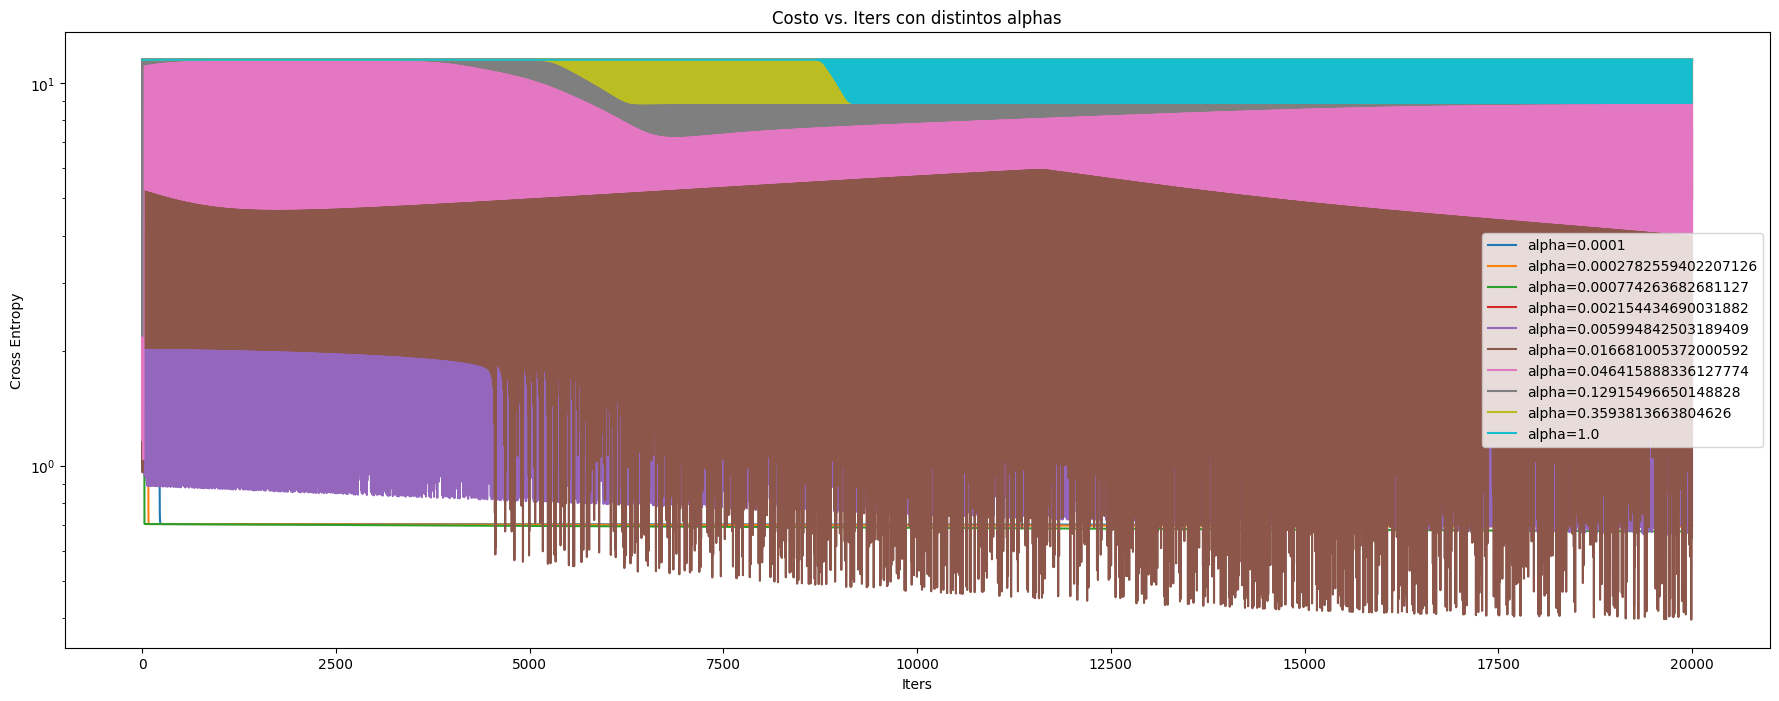

Learning Rate: 0.0001
  Costo Final: 0.701345
  theta_0: 0.271034, theta_1: -0.001058

Learning Rate: 0.0003
  Costo Final: 0.693971
  theta_0: 0.108898, theta_1: 0.000875

Learning Rate: 0.0008
  Costo Final: 0.674552
  theta_0: -0.329958, theta_1: 0.006108

Learning Rate: 0.0022
  Costo Final: 1.906192
  theta_0: -1.620080, theta_1: -0.006038

Learning Rate: 0.0060
  Costo Final: 0.718446
  theta_0: -5.032620, theta_1: 0.192855

Learning Rate: 0.0167
  Costo Final: 4.978230
  theta_0: -14.094708, theta_1: 0.796665

Learning Rate: 0.0464
  Costo Final: 11.512925
  theta_0: -41.819636, theta_1: 0.720227

Learning Rate: 0.1292
  Costo Final: 11.512925
  theta_0: -117.035359, theta_1: 0.943415

Learning Rate: 0.3594
  Costo Final: 11.512925
  theta_0: -326.273807, theta_1: 5.131131

Learning Rate: 1.0000
  Costo Final: 11.512925
  theta_0: -908.532250, theta_1: 14.088953



In [300]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8)) # Graficamos los resultados

for result in resultados:
    plt.plot(result["costos"], label=f"alpha={result['learning_rate']}")

plt.title('Costo vs. Iters con distintos alphas')
plt.xlabel('Iters')
plt.ylabel('Cross Entropy')
plt.legend()
plt.yscale('log')

plt.show()

for result in resultados: # Mostramos los resultados finales
    print(f"Learning Rate: {result['learning_rate']:.4f}")
    print(f"  Costo Final: {result['costo_final']:.6f}")
    print(f"  theta_0: {result['theta_0']:.6f}, theta_1: {result['theta_1']:.6f}\n")

 Observamos que el gráfico con $\alpha = 1$ muestra los mejores resultados. En este caso, utilizaremos el $\alpha = 1.$ ( Se utiliza el máximo porque se multiplica por -1 para poder graficar los valores en un rango positivo).

In [316]:
# Guardaremos todos los pesos
x_theta_0 = []
x_theta_1 = []
for result in resultados:
  x_theta_0.append(result['theta_0'])
  x_theta_1.append(result['theta_1'])

In [317]:
# Extraemos solo los de alpha = 1
theta_0 = x_theta_0[-1]
theta_1 = x_theta_1[-1]
print(theta_0, theta_1)

-1175.6512059645818 48.590212330219245


In [318]:
y_pred = []
for i in range(0, len(x_1v)):
  y_i = 1/(1 + np.exp(-(theta_0 + theta_1*x_1v[i])))
  y_pred.append(round(y_i))
  costo = - np.mean(y_i * np.log(h_0+1e-10) + (1 - y_i) * np.log(1 - h_0+1e-10))
  print(f'Costo{i+1} : {costo}')

Costo1 : 23.025850929940457
Costo2 : 23.025850929940457


In [319]:
y_pred

[1, 1]

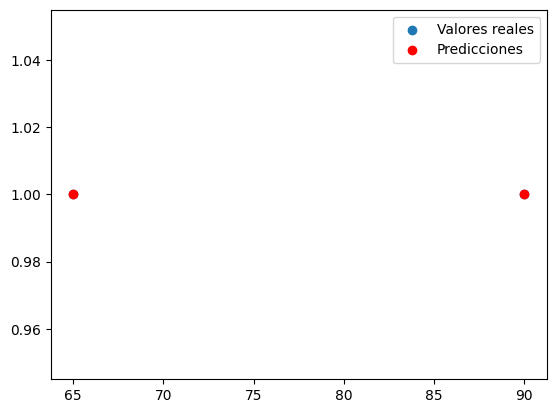

In [320]:
import matplotlib.pyplot as plt
plt.scatter(x_1v, y_v)
plt.scatter(x_1v, y_pred, color='red')
plt.legend(['Valores reales', 'Predicciones'], loc = 'best')

Observamos que se predicen correctamente los dos valores.

In [321]:
# Scores
true_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] == y_v[i]: true_pos +=1

true_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] == y_v[i]: true_neg +=1

false_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] != y_v[i]: false_pos +=1


false_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] != y_v[i]: false_neg +=1

Accuracy = (true_pos + true_neg) / len(y_v)

if (true_pos + false_pos) == 0:
    Precision = 0
else:
    Precision = true_pos / (true_pos + false_pos)

if (true_pos + false_neg) == 0:
    Recall = 0
else:
    Recall = true_pos / (true_pos + false_neg)
if (Precision + Recall) == 0:
    F_1 = 0
else:
    F_1 = (2 * Precision * Recall) / (Precision + Recall)
print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF_1 Score:',F_1)

Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F_1 Score: 1.0


# Algoritmo de regresión logística con columna Homework

Se hará exactamente lo mismo que anteriormente, pero ahora con la columna Homework

In [322]:
learning_rates = np.logspace(-4, 0, 10)  # Se crean 10 valores logarítimicos entre 10e-4 a 1
resultados = [] # Aquí presentaremos nuestros resultados
for alpha in learning_rates: # Probaremos con cada alpha

  # Jalamos los pesos del inicializador
    theta_0 = (values[0].numpy())[0]
    theta_1 = (values[1].numpy())[0]
    costos = [] # Creamos la lista de los costos

  # Nuestro Algoritmo de Gradiente Descendente

    for i in range(20000):
    # Definimos nuestra función h_0, nuestra delta y nuestra delta * x1
        h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x2_1)))
        delta = h_0 - y_t
        delta_x2 = delta * x2_1

    # Actualizamos nuestros pesos
        theta_0 -= alpha * (1/n) * np.sum(delta)
        theta_1 -= alpha * (1/n) * np.sum(delta_x2)


        costo = - np.mean(y_t * np.log(h_0+1e-10) + (1 - y_t) * np.log(1 - h_0+1e-10))   # Calculamos costo con Cross Entropy
        costos.append(costo) # Agregamos el costo a la lista de los costos

# Adjuntamos los valores relevantes encontrados con alpha
    resultados.append({
        "learning_rate": alpha,
        "costo_final": costos[-1],
        "theta_0": theta_0,
        "theta_1": theta_1,
        "costos": costos
    })

<ipython-input-322-23f1bb252c48>:14: RuntimeWarning: overflow encountered in exp
  h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x2_1)))


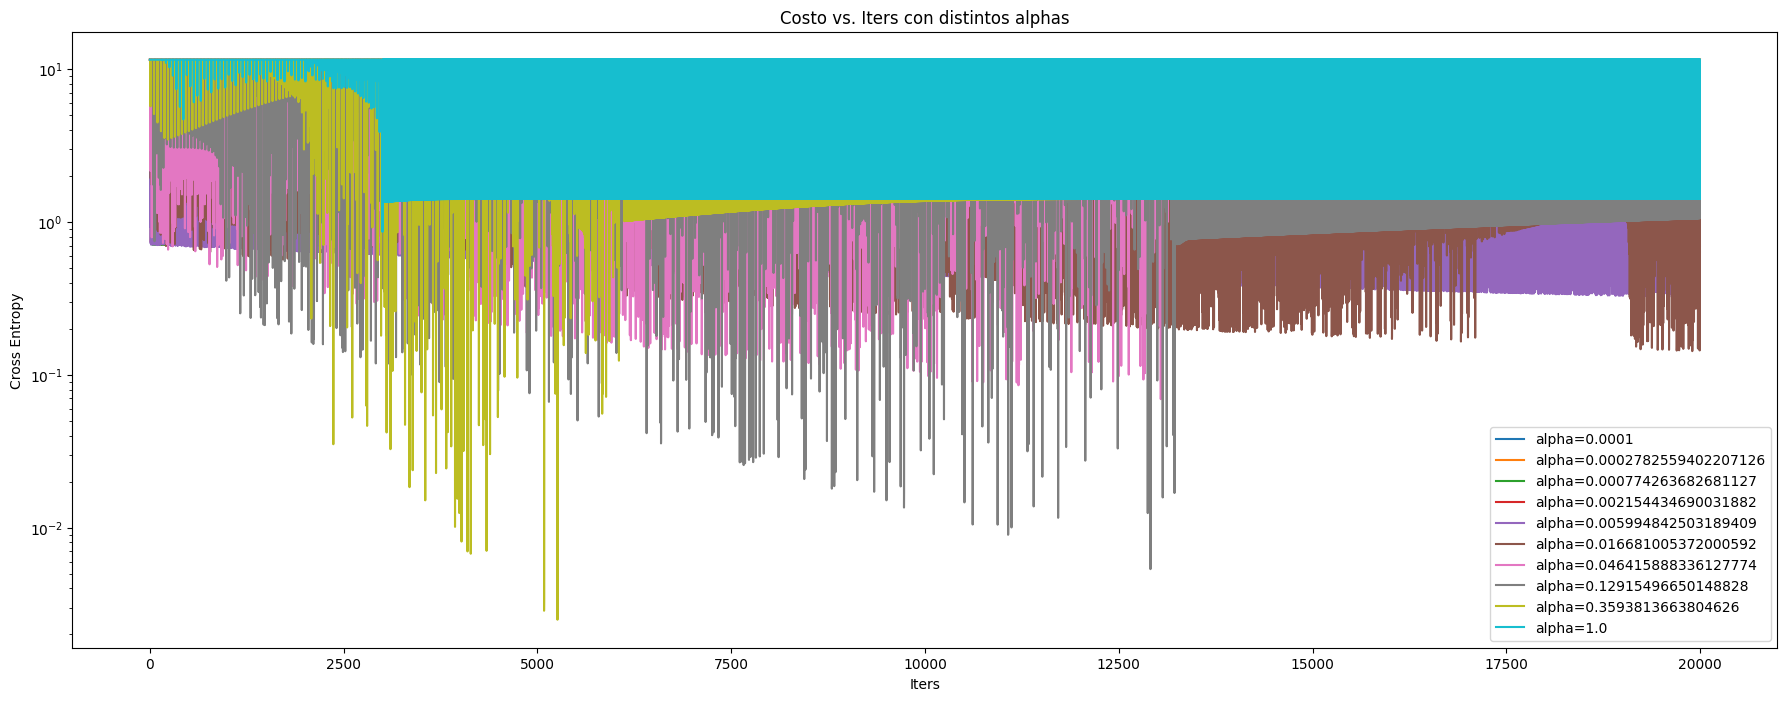

Learning Rate: 0.0001
  Costo Final: 0.697320
  theta_0: 0.209216, theta_1: 0.001343

Learning Rate: 0.0003
  Costo Final: 0.676900
  theta_0: -0.060568, theta_1: 0.004816

Learning Rate: 0.0008
  Costo Final: 0.626306
  theta_0: -0.768758, theta_1: 0.013960

Learning Rate: 0.0022
  Costo Final: 1.126567
  theta_0: -2.850180, theta_1: 0.019829

Learning Rate: 0.0060
  Costo Final: 3.262260
  theta_0: -7.884484, theta_1: 0.274942

Learning Rate: 0.0167
  Costo Final: 0.901774
  theta_0: -23.115380, theta_1: 0.026812

Learning Rate: 0.0464
  Costo Final: 11.512925
  theta_0: -65.912327, theta_1: 0.620324

Learning Rate: 0.1292
  Costo Final: 11.512925
  theta_0: -172.067611, theta_1: 2.548747

Learning Rate: 0.3594
  Costo Final: 11.512925
  theta_0: -441.340739, theta_1: 6.426253

Learning Rate: 1.0000
  Costo Final: 11.512925
  theta_0: -1175.651206, theta_1: 48.590212



In [323]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8)) # Graficamos los resultados

for result in resultados:
    plt.plot(result["costos"], label=f"alpha={result['learning_rate']}")

plt.title('Costo vs. Iters con distintos alphas')
plt.xlabel('Iters')
plt.ylabel('Cross Entropy')
plt.legend()
plt.yscale('log')

# Mostraremos este rango, pues es donde hubo realmente cambios significativos
plt.show()

for result in resultados: # Mostramos los resultados finales
    print(f"Learning Rate: {result['learning_rate']:.4f}")
    print(f"  Costo Final: {result['costo_final']:.6f}")
    print(f"  theta_0: {result['theta_0']:.6f}, theta_1: {result['theta_1']:.6f}\n")

 Observamos que el gráfico con $\alpha = 0.3593$ muestra los mejores resultados. En este caso, utilizaremos el $\alpha = 0.3593.$ ( Se utiliza el máximo porque se multiplica por -1 para poder graficar los valores en un rango positivo).

In [324]:
# Guardaremos todos los pesos
x_theta_0 = []
x_theta_1 = []
for result in resultados:
  x_theta_0.append(result['theta_0'])
  x_theta_1.append(result['theta_1'])

In [325]:
# Extraemos solo los de alpha = 0.3593
theta_0 = x_theta_0[-2]
theta_1 = x_theta_1[-2]
print(theta_0, theta_1)

-441.34073857638924 6.426253268482279


In [326]:
y_pred = []
for i in range(0, len(x2_v)):
  y_i = 1/(1 + np.exp(-(theta_0 + theta_1*x2_v[i])))
  y_pred.append(y_i)
  costo = - np.mean(y_i * np.log(h_0+1e-10) + (1 - y_i) * np.log(1 - h_0+1e-10))
  print(f'Costo{i+1} : {costo}')

Costo1 : 23.025850929940457
Costo2 : 23.025850929940457


In [327]:
y_pred

[1.0, 1.0]

In [328]:
len(y_v)

2

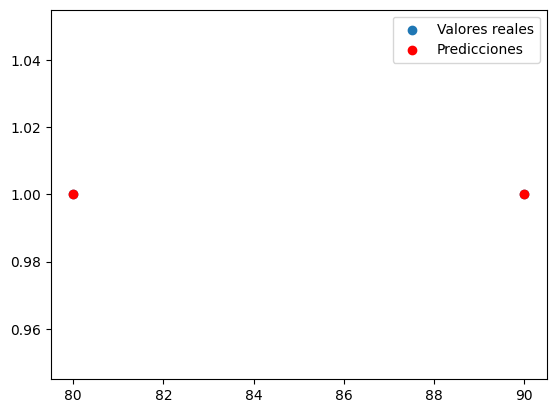

In [329]:
import matplotlib.pyplot as plt
plt.scatter(x2_v, y_v)
plt.scatter(x2_v, y_pred, color='red')
plt.legend(['Valores reales', 'Predicciones'], loc = 'best')

Observamos que se predicen correctamente los dos valores.

In [330]:
# Scores
true_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] == y_v[i]: true_pos +=1

true_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] == y_v[i]: true_neg +=1

false_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] != y_v[i]: false_pos +=1


false_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] != y_v[i]: false_neg +=1


Accuracy = (true_pos + true_neg )/ len(y_v)
Precision = (true_pos)/ (true_pos + false_pos)
Recall = (true_pos)/ (true_pos + false_neg)
F_1 = (2 * Precision * Recall) / (Precision + Recall)
print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF_1 Score:',F_1)

Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F_1 Score: 1.0
